In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [4]:
rawhousingdata=pd.read_csv("1. Regression - Module - (Housing Prices).csv")

In [5]:
rawhousingdata

,ID,Date House was Sold,Sale Price,No of Bedrooms,No of Bathrooms,Flat Area (in Sqft),Lot Area (in Sqft),No of Floors,Waterfront View,No of Times Visited,...,Overall Grade,Area of the House from Basement (in Sqft),Basement Area (in Sqft),Age of House (in Years),Renovated Year,Zipcode,Latitude,Longitude,Living Area after Renovation (in Sqft),Lot Area after Renovation (in Sqft)
0,7129300520,14 October 2017,221900.0,3,1.00,1180.0,5650.0,1.0,No,NaN,...,7,1180.0,0,63,0,98178.0,47.5112,-122.257,1340.0,5650
1,6414100192,14 December 2017,538000.0,3,2.25,2570.0,7242.0,2.0,No,NaN,...,7,2170.0,400,67,1991,98125.0,47.7210,-122.319,1690.0,7639
2,5631500400,15 February 2016,180000.0,2,1.00,770.0,10000.0,1.0,No,NaN,...,6,770.0,0,85,0,98028.0,47.7379,-122.233,2720.0,8062
3,2487200875,14 December 2017,604000.0,4,3.00,1960.0,5000.0,1.0,No,NaN,...,7,1050.0,910,53,0,98136.0,47.5208,-122.393,1360.0,5000
4,1954400510,15 February 2016,510000.0,3,2.00,1680.0,8080.0,1.0,No,NaN,...,8,1680.0,0,31,0,98074.0,47.6168,-122.045,1800.0,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,14 May 2017,360000.0,3,2.50,1530.0,1131.0,3.0,No,NaN,...,8,1530.0,0,9,0,98103.0,47.6993,-122.346,1530.0,1509
21609,6600060120,15 February 2016,400000.0,4,2.50,2310.0,5813.0,2.0,No,NaN,...,8,2310.0,0,4,0,98146.0,47.5107,-122.362,1830.0,7200
21610,1523300141,14 June 2017,402101.0,2,0.75,1020.0,1350.0,2.0,No,NaN,...,7,1020.0,0,9,0,98144.0,47.5944,-122.299,1020.0,2007
21611,291310100,15 January 2016,400000.0,3,2.50,1600.0,2388.0,2.0,No,NaN,...,8,1600.0,0,14,0,98027.0,47.5345,-122.069,1410.0,1287


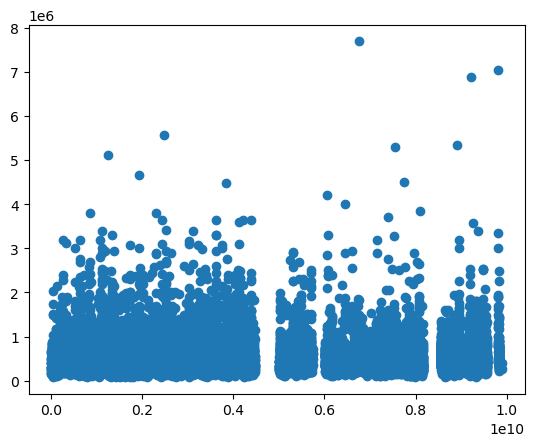

In [6]:
plt.scatter(x=rawhousingdata['ID'],y=rawhousingdata["Sale Price"])

In [7]:
rawhousingdata["Sale Price"].describe()

count    2.160900e+04
mean     5.401984e+05
std      3.673890e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      7.700000e+06
Name: Sale Price, dtype: float64

<Axes: xlabel='Sale Price'>

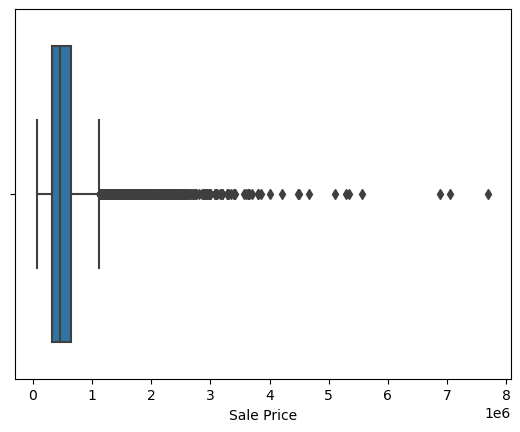

In [8]:
sns.boxplot(x=rawhousingdata['Sale Price'])

In [9]:
q1 =  rawhousingdata['Sale Price'].quantile(0.25)
q3 =  rawhousingdata['Sale Price'].quantile(0.75)
iqr = q3 - q1

In [10]:
iqr

323050.0

In [11]:
upper_limit=q3+1.5*iqr
lower_limit=q1-1.5*iqr
upper_limit,lower_limit

(1129575.0, -162625.0)

In [12]:
def limit_imputer(value):
    if value>upper_limit:
        return upper_limit
    elif value<lower_limit:
        return lower_limit
    else:
        return value
    

In [13]:
rawhousingdata["Sale Price"]=rawhousingdata['Sale Price'].apply(limit_imputer)

In [14]:
rawhousingdata['Sale Price'].describe()

count    2.160900e+04
mean     5.116186e+05
std      2.500620e+05
min      7.500000e+04
25%      3.219500e+05
50%      4.500000e+05
75%      6.450000e+05
max      1.129575e+06
Name: Sale Price, dtype: float64

In [15]:
rawhousingdata.dropna(inplace=True, axis=0,subset=['Sale Price'])

Text(0.5, 1.0, 'histogram of rawhousingdata')

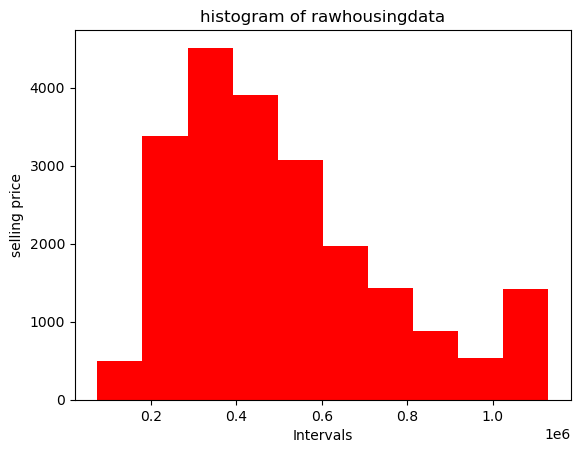

In [16]:
plt.hist(rawhousingdata['Sale Price'], bins = 10 , color = 'red')
plt.xlabel("Intervals")
plt.ylabel("selling price")
plt.title("histogram of rawhousingdata")

In [17]:
numerical_columns=["No of Bathrooms","Flat Area (in Sqft)","Lot Area (in Sqft)","Area of the House from Basement (in Sqft)",  
                   "Latitude","Longitude","Living Area after Renovation (in Sqft)"]

In [18]:
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(missing_values = np.nan,strategy = 'median')
rawhousingdata[numerical_columns] = imputer.fit_transform(rawhousingdata[numerical_columns])

In [19]:
rawhousingdata["Zipcode"].shape

(21609,)

In [20]:
column = rawhousingdata['Zipcode'].values.reshape(-1,1)
column.shape

(21609, 1)

In [21]:
column = rawhousingdata["Zipcode"].values.reshape(-1,1)
imputer = SimpleImputer(missing_values = np.nan,strategy="most_frequent")
rawhousingdata["Zipcode"] = imputer.fit_transform(column)

In [22]:
rawhousingdata.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21609 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   ID                                         21609 non-null  int64  
 1   Date House was Sold                        21609 non-null  object 
 2   Sale Price                                 21609 non-null  float64
 3   No of Bedrooms                             21609 non-null  int64  
 4   No of Bathrooms                            21609 non-null  float64
 5   Flat Area (in Sqft)                        21609 non-null  float64
 6   Lot Area (in Sqft)                         21609 non-null  float64
 7   No of Floors                               21609 non-null  float64
 8   Waterfront View                            21609 non-null  object 
 9   No of Times Visited                        2124 non-null   object 
 10  Condition of the House     

In [23]:
rawhousingdata['No of Times Visited'].unique()

array([nan, 'Thrice', 'Four', 'Twice', 'Once'], dtype=object)

In [32]:
column = rawhousingdata["No of Times Visited"].values.reshape(-1,1)
imputer=SimpleImputer(missing_values = np.nan,strategy = 'most_frequent')
rawhousingdata["No of Times Visited"] = imputer.fit_transform(column)

ValueError: 2